# 02. Neural Network Classification with TensorFlow
Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.



In [ ]:
import tensorflow as tf
print("version of tensorflow : ",tf.__version__)

version of tensorflow :  2.8.0


# creating data to view 

In [ ]:
# get data into sklearn datasets make_circle()
from sklearn.datasets import make_circles
# how many sample get 
n_sample = 1000
# get circle dataset
X ,y = make_circles(n_sample,noise=0.03,random_state=42)
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))

In [ ]:
# make dataframe featur and label
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# check different label total value
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

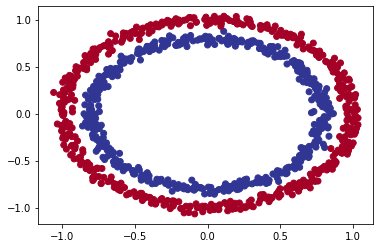

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

# Input and Output shape

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# first value see
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).
* evaluate a model - improve our model

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.



In [ ]:
# start with simple model
# first set to random seed
tf.random.set_seed(42)
# 1.create a model
circle_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. compile a model
circle_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["accuracy"])
# 3. fit a model
circle_model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 6ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# now improve short option train  longer
circle_model.fit(X,y,epochs=200,verbose=0)
circle_model.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?



In [ ]:

# set random sedd
tf.random.set_seed(42)
# 1. create a model 
circle_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. compile a model
circle_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["accuracy"])
# 3. fit a model
circle_model_2.fit(X,y,epochs=100,verbose=0)


In [ ]:
circle_model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

# Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).


In [ ]:
# set to random seed
tf.random.set_seed(42)
# 1.create model with extra layers and extra units, activation change
circle_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,input_shape=(None,1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile a model use Adam instiead of SGD
circle_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])
# 3. fit a model more epochs
circle_model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
circle_model_3.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

Let's make some visualizations to see what's happening.

> **🔑 Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: 
**visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.


> **🔑 Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing multiclass classification...


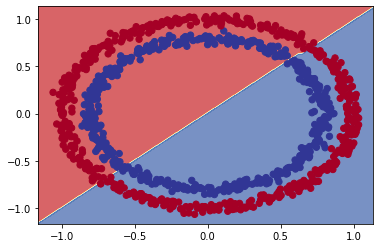

In [ ]:
plot_decision_boundary(circle_model_3,X,y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
circle_model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 8ms/step - loss: -4016.8501 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: -7145.1177 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: -7154.2358 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.



In [ ]:
circle_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 100)         200       
                                                                 
 dense_4 (Dense)             (None, None, 10)          1010      
                                                                 
 dense_5 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# setup random seed
tf.random.set_seed(42)
# 1. crate the model
circle_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile the model but this loss hyparparameter set regrassion specific
circle_model_3.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])
# fit the model
circle_model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

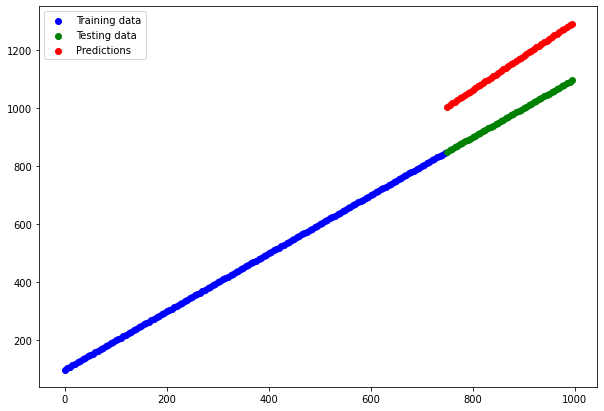

In [ ]:
# Make predictions with our trained model
y_reg_preds = circle_model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [ ]:

# setup random seed
tf.random.set_seed(42)
# 1. create the model
circle_model_4 = tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(2,activation="relu")])

# compile the model
circle_model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(lr=0.03),
                       metrics=["accuracy"])
# fit the model
circle_model_4.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step - loss: 0.9733 - accuracy: 0.5190
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7230 - accuracy: 0.5140
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7206 - accuracy: 0.5570
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7093 - accuracy: 0.5240
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7092 - accuracy: 0.5300
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7064 - accuracy: 0.5310
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.6090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5700
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5640
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.6230
Epoch 11/100
32/32 [=

In [ ]:
circle_model_4.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.5860


[0.6203774809837341, 0.5860000252723694]

doing multiclass classification...


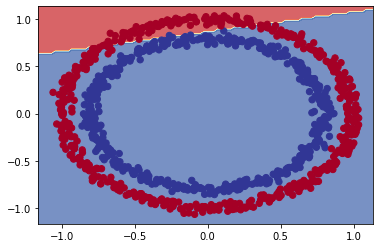

In [ ]:
plot_decision_boundary(circle_model_4,X,y)

In [ ]:
X_test ,y_test = make_circles(1200,noise=0,random_state=42)
X_test.shape,y_test.shape

((1200, 2), (1200,))

In [ ]:
X_test_pred = X_test[1000:1200]
y_test_pred = y_test[1000:1200]
X_test_pred.shape,y_test_pred.shape

((200, 2), (200,))

In [ ]:
y_pred = circle_model_4.predict(X_test_pred)


In [ ]:
circle_model_4.evaluate(X_test_pred,y_test_pred)

7/7 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.6700


[0.5906497240066528, 0.6700000166893005]

doing multiclass classification...


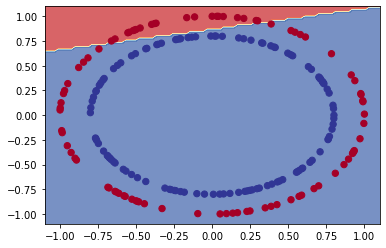

In [ ]:
plot_decision_boundary(circle_model_4,X_test_pred,y_test_pred)

In [ ]:
# see our model two option provide but i am only one option get set to extra hidden layer set to 1
# set random seed
tf.random.set_seed(42)
# 1. create a model
circle_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="tanh"),
  tf.keras.layers.Dense(4,activation="tanh"),
  tf.keras.layers.Dense(1,activation="tanh")
])

# 2. compile a model
circle_model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(lr=0.03),
                       metrics=["accuracy"])
# 3 fit the model
circle_model_5.fit(X,y,epochs=216)


Epoch 1/216


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step - loss: 1.2209 - accuracy: 0.5260
Epoch 2/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5660
Epoch 3/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5750
Epoch 4/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.6060
Epoch 5/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.5600
Epoch 6/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5820
Epoch 7/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5990
Epoch 8/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.5890
Epoch 9/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6492 - accuracy: 0.5990
Epoch 10/216
32/32 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.7100
Epoch 11/216
32/32 [=

doing binary classifcation...


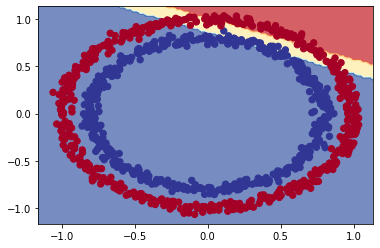

In [ ]:
plot_decision_boundary(circle_model_5,X,y)

In [ ]:
circle_model_5.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.5810


[0.6357570886611938, 0.5809999704360962]

doing binary classifcation...


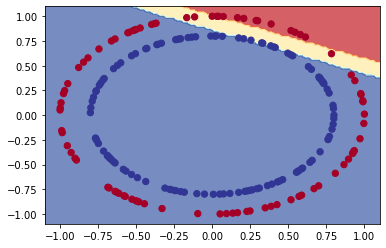

In [ ]:
plot_decision_boundary(circle_model_5,X_test_pred,y_test_pred)

In [ ]:
circle_model_5.evaluate(X_test_pred,y_test_pred)

7/7 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.6050


[0.6310556530952454, 0.6050000190734863]

In [ ]:
y_pred = circle_model_5.predict(X_test_pred)

In [ ]:
y_pred[:5]

array([[-0.36121014],
       [ 0.5693147 ],
       [ 0.5675906 ],
       [ 0.5691859 ],
       [ 0.5679979 ]], dtype=float32)

In [ ]:
y_test_pred[:5]

array([0, 1, 0, 1, 1])

In [ ]:
circle_model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 12        
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# set random seed
tf.random.set_seed(42)
# 1. create a model but this time add output layer sigmond
circle_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="tanh"),
  tf.keras.layers.Dense(4,activation="tanh"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile a model
circle_model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(lr=0.03),
                       metrics=["accuracy"])
# 3 fit the model
circle_model_5.fit(X,y,epochs=100)



Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step - loss: 0.6983 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5320
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5280
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5550
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.5550
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.5890
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5920
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6100
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6315 - accuracy: 0.6600
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5793 - accuracy: 0.7410
Epoch 11/100
32/32 [=

In [ ]:
circle_model_5.evaluate(X_test_pred,y_test_pred)

7/7 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 1.0000


[0.012093182653188705, 1.0]

In [ ]:
circle_model_5.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9760


[0.0661429762840271, 0.9760000109672546]

doing binary classifcation...


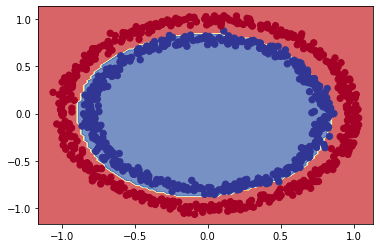

In [ ]:
plot_decision_boundary(circle_model_5,X,y)

doing binary classifcation...


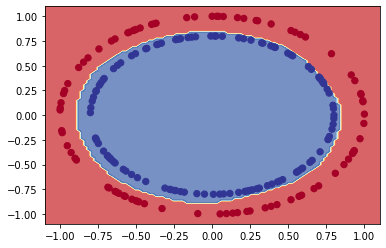

In [ ]:
plot_decision_boundary(circle_model_5,X_test_pred,y_test_pred)



> **🤔 Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> **🔑 Note:** The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.





In [ ]:
# let's create toy data
A = tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

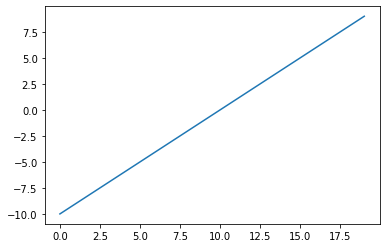

In [ ]:
# Vesulize our data
plt.plot(A)

Nice, now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.



In [ ]:
# now create custom sigmoid function
def sigmoid(x):
    return 1/(1 + tf.exp(-x))
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

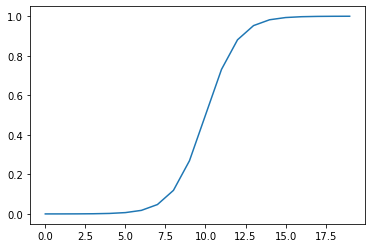

In [ ]:
# let' see custom sigmoid function visualize
plt.plot(sigmoid(A))

In [ ]:
# let's create custom relu function
def relu(x):
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

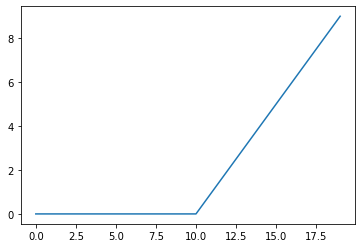

In [ ]:
# let's see relu plot
plt.plot(relu(A))

In [ ]:
# tanh activation function in tensorflow formula is:  tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x))).
def tanh(x):
    xx = ((tf.exp(x)- tf.exp(-x))//(tf.exp(x)+ tf.exp(-x)))
    sinh = tf.sinh(x)/tf.cosh(x)
    return sinh

tanh(A)
    

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

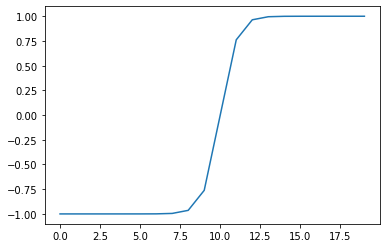

In [ ]:
# let's see custom tanh plot use custom tanh function
plt.plot(tanh(A))

split our data in train set and test set use index split option you also use sklearn train_test_split() function that is fine but i am use index option ok let's starting code.

In [ ]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:1000],y[800:1000]
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
# now create the model
# setup random seed
tf.random.set_seed(42)
# 1. create the model
circle_model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# compile the model
circle_model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(lr=0.01),
                       metrics=["accuracy"])
# fit the model
history = circle_model_6.fit(X_train,y_train,epochs=25) # history variable set becuse fit in tensorflow function return traking on loss and which metrics you choose

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [ ]:
# evaluate the model 
circle_model_6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

doing binary classifcation...


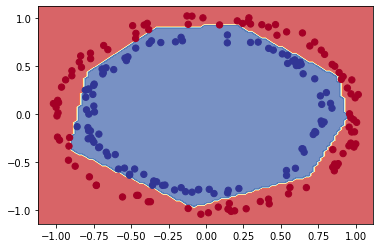

In [ ]:
# see visualize prediction
plot_decision_boundary(circle_model_6,X_test,y_test)

doing binary classifcation...
doing binary classifcation...


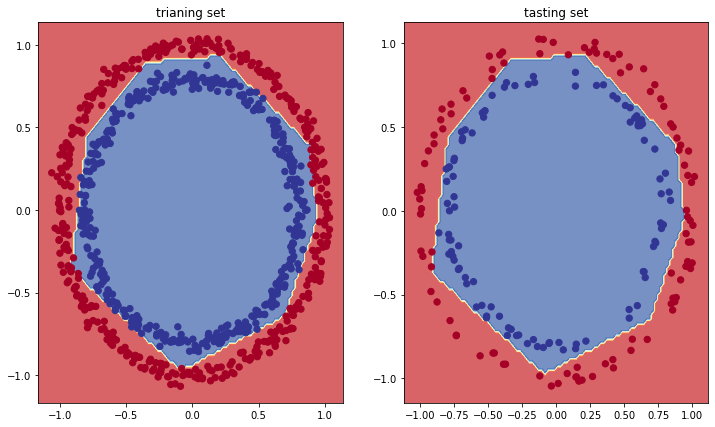

In [ ]:
# now see train plot and test plot in model prediction
plt.figure(figsize=[12,7])
plt.subplot(1,2,1)
plt.title("trianing set")
plot_decision_boundary(circle_model_6,X_train,y_train)
plt.subplot(1,2,2)
plt.title("tasting set")
plot_decision_boundary(circle_model_6,X_test,y_test)
plt.show();

In [ ]:
# documantion say fit function history object return let's see 
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632685661315918,
  0.6545671820640564,
  0.6412574648857117,
  0.6264280676841736,
  0.603830873966217,
  0.5714035034179688,
  0.5404428243637085,
  0.5015037059783936,
  0.46833184361457825,
  0.41130152344703674,
  0.36250582337379456,
  0.3209042251110077,
  0.2847079336643219,
  0.2597199082374573,
  0.23746894299983978,
  0.213519

In [ ]:
# history data convert to panda dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'circle model 6 loss curv')

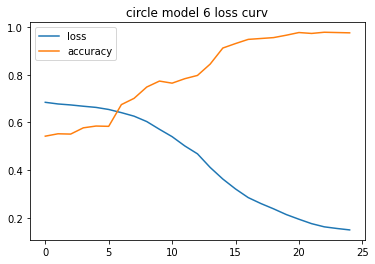

In [ ]:
# let's visualize loss and accuracy in model 6
pd.DataFrame(history.history).plot()
plt.title("circle model 6 loss curv")

# Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of 0.001 (default) to 0.01.

* A learning rate **[callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)**.
* You can think of a callback as an extra piece of functionality you can add to your model while its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
A modified loss curves plot.






> **🔑 Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.



In [ ]:
# set random seed
tf.random.set_seed(42)
# 1. create the model
circle_model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile the model
circle_model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer="adam",
                       metrics=["accuracy"])
# 3. set the callback
lr_schudler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # # traverse a set of learning rate values starting from 1e-

# 3. fit the model with callbacks
history_7 = circle_model_7.fit(X_train,y_train,epochs=100,callbacks=[lr_schudler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

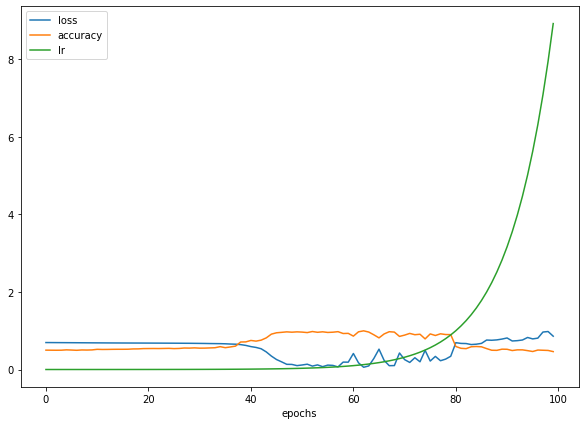

In [ ]:
# Checkout the history
pd.DataFrame(history_7.history).plot(figsize=[10,7],xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

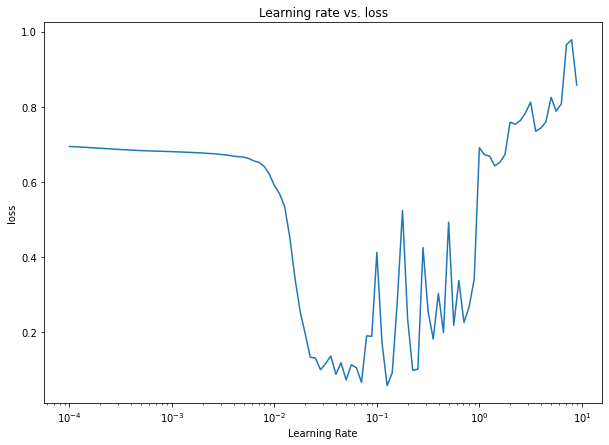

In [ ]:


lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs. loss")

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4,

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# now create the model but this time set to ideal learning rate
# setup random seed
tf.random.set_seed(42)
# 1. create the model
circle_model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile the model and set to ideal learning rate
circle_model_8.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(lr=0.02),
                       metrics=["accuracy"])
# 3. fit the model
history_8 = circle_model_8.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [ ]:
# evaluate model ideal learning rate use
print("test data set:")
circle_model_8.evaluate(X_test,y_test)
print("\ntraining data set:")
circle_model_8.evaluate(X_train,y_train)

test data set:
7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900

training data set:
25/25 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9912


[0.06653013080358505, 0.9912499785423279]

In [ ]:
# now see model 6 unseen predict performance
circle_model_6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

doing binary classifcation...


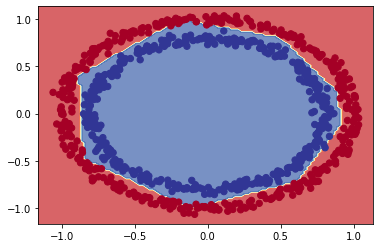

In [ ]:
# visulize ideal learning rate use and  training data set
plot_decision_boundary(circle_model_8,X_train,y_train)

doing binary classifcation...


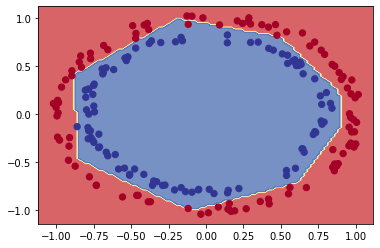

In [ ]:
# visulize idea learning rate use and test set see
plot_decision_boundary(circle_model_8,X_test,y_test)

doing binary classifcation...
doing binary classifcation...


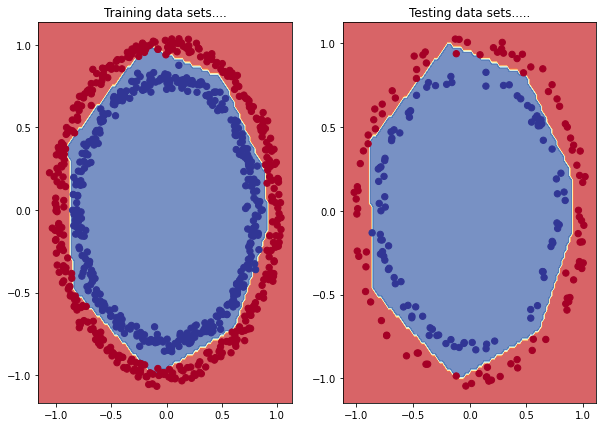

In [ ]:
# plot decision boundary of training and test set. model is 8 ideal learning rate use
plt.figure(figsize=[10,7])
plt.subplot(1,2,1)
plt.title("Training data sets....")
plot_decision_boundary(circle_model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing data sets.....")
plot_decision_boundary(circle_model_8,X_test,y_test)

doing binary classifcation...
doing binary classifcation...


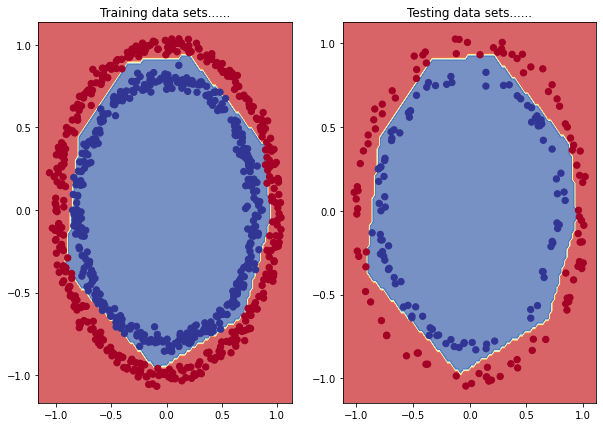

In [ ]:
# plot dicision boundary of training and test set .model 6 
plt.figure(figsize=[10,7])
plt.subplot(1,2,1)
plt.title("Training data sets......")
plot_decision_boundary(circle_model_6,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing data sets......")
plot_decision_boundary(circle_model_6,X_test,y_test)

# More classification evaluation methods
Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.


> **Metric name/Evaluation method**	Defintion	Code

 * **Accuracy:**	Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.	sklearn.metrics.accuracy_score() or tf.keras.metrics.Accuracy()

 * **Precision:**	Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).	sklearn.metrics.precision_score() or tf.keras.metrics.Precision()

* **Recall:**	Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.	sklearn.metrics.recall_score() or tf.keras.metrics.Recall()

* **F1-score:**	Combines precision and recall into one metric. 1 is best, 0 is worst.	sklearn.metrics.f1_score()
Confusion matrix	Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).	Custom function or sklearn.metrics.plot_confusion_matrix()

* **Classification report:**	Collection of some of the main classification metrics such as precision, recall and f1-score.	sklearn.metrics.classification_report()

> **🔑 Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.





In [ ]:
from sklearn.metrics import confusion_matrix
y_preds_8 = circle_model_8.predict(X_test.squeeze())
y_preds_6 = circle_model_6.predict(X_test.squeeze())
y_preds_8.squeeze()[:3],y_preds_8.shape,y_test.shape,X_test.shape

(array([0.98526543, 0.9992379 , 0.99032354], dtype=float32),
 (200, 1),
 (200,),
 (200, 2))

In [ ]:
# my ideal learning rate model prediction
confusion_matrix(y_test,tf.round(y_preds_8.squeeze()))

array([[99,  2],
       [ 0, 99]])

In [ ]:
y_test[:10],y_preds_8.squeeze()[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([9.8526543e-01, 9.9923790e-01, 9.9032354e-01, 9.9706942e-01,
        3.9622894e-01, 1.8126877e-02, 9.6829069e-01, 1.9746670e-02,
        9.9967170e-01, 5.6459074e-04], dtype=float32))

In [ ]:
# model 6 prediction very well
confusion_matrix(y_test,tf.round(y_preds_6.squeeze()))

array([[101,   0],
       [  0,  99]])

In [ ]:
# 1. frist accuracy check 
loss ,accuracy = circle_model_8.evaluate(X_test,y_test)
print(f"loss circle model 8: {loss}")
print(f"accuracy circle model 8: {(accuracy * 100):.2f}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
loss circle model 8: 0.05740181356668472
accuracy circle model 8: 99.00


# How about confusion matrix

In [ ]:
# create confusion matrix sklearn.metrics.confusion_matrix use
confusion_matrix(y_test,tf.round(y_preds_8)) # round function use becuse our prediction of model not human radeble convert to human redable


array([[99,  2],
       [ 0, 99]])

How about we make a function to make our confusion matrix a little more visual?

 >**Note:** The following confusion matrix code is a remix of Scikit-Learn's 
     
plot_confusion_matrix function - https://scikit-learn.org/stable/modules/  generated/sklearn.metrics.plot_confusion_matrix.html
 
and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 



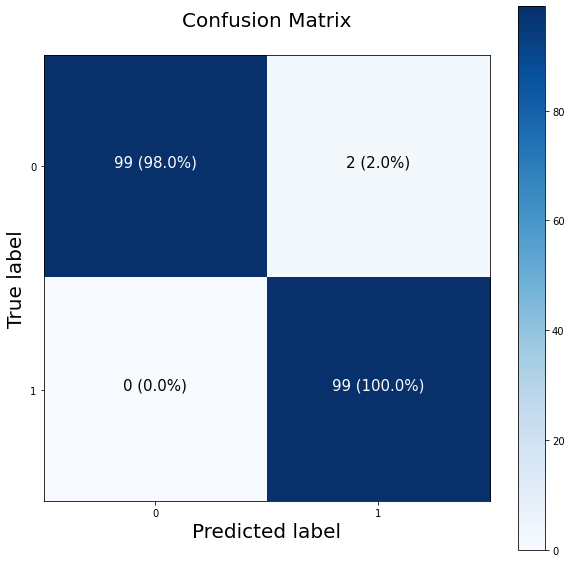

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds_8))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


# Working with a learger example (multipleclass classfication)
We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.


> **📖 Resource:** The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.



In [ ]:
# reimport 
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()
# label data frame create Label	Description
class_name = np.array(["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# let's see train data and train labels
print(f"\nTraining data {train_data[0]}\n")
print(f"\Training labels {test_data[0]}\n")


Training data [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [ ]:
# check the data shape
train_data.shape,train_labels.shape,test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# check shape of single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.



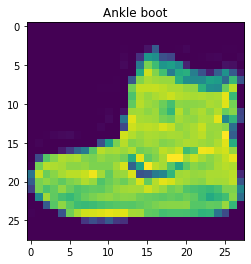

In [ ]:
# plot single example and show with label
import matplotlib.pyplot as plt
plt.title(f"{class_name[train_labels[0]]}")
plt.imshow(train_data[0])

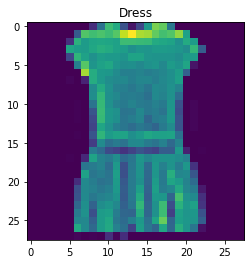

In [ ]:
# let's see one more
plt.title(f"{class_name[train_labels[3]]}")
plt.imshow(train_data[3])

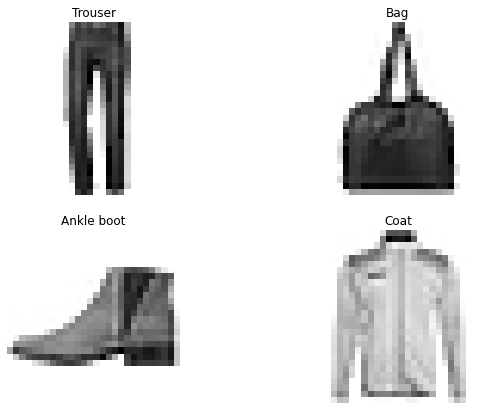

In [ ]:
# multiple image show 
import random
plt.figure(figsize=[10,7])
for i in range(4):
    plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)
    plt.title


Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.



In [ ]:
# set random seed
tf.random.set_seed(42)
# 1.create the model
fashion_model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10,activation="softmax")
])

# 2. compile the model
fashion_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])
# 3. fit the model
history_model_1 = fashion_model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy

In [ ]:
# check the shape our model 
# check summary of model 1
fashion_model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the minium and maximum of train data
train_data.min(),train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).



In [ ]:
# Divide train and test image by the maximum value (normalize it)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# let's check minimum and maximum value in normalize data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

We'll use the same model as before (model_11) except this time the data will be normalized.



In [ ]:
# setup random seed
tf.random.set_seed(42)
# 1. create model
fashion_model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

# 2. compile the model
fashion_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])
# 3. fit the model
non_norm_history = fashion_model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
y_pred = fashion_model_2.predict(test_data_norm)
tf.round(y_pred)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

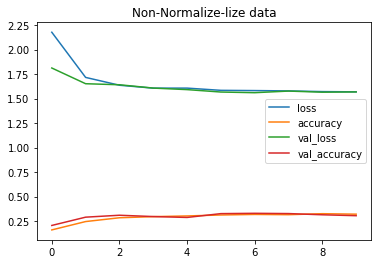

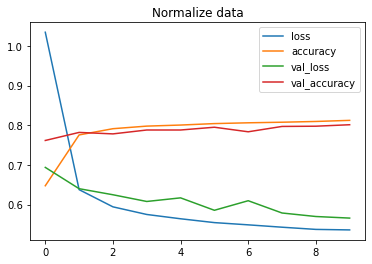

In [ ]:
# let's visualize non-normalize data and normalize data model evaluate
pd.DataFrame(history_model_1.history).plot(title="Non-Normalize-lize data")
pd.DataFrame(non_norm_history.history).plot(title="Normalize data")

**🔑 Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).



In [ ]:
# find the ideal learning rate 
# set the random seed
tf.random.set_seed(42)
# 1. create  the model
fashion_model_idel = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])
# 2 compile the model
fashion_model_idel.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(lr=0.001),
                           metrics=["accuracy"])
# learning rate finding callback create
lr_scheduale = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
# fit the model
iedeal_model_history = fashion_model_idel.fit(train_data_norm,train_labels ,epochs=40,validation_data=(test_data_norm,test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Text(0.5, 1.0, 'Finding The best ideal learning rate.')

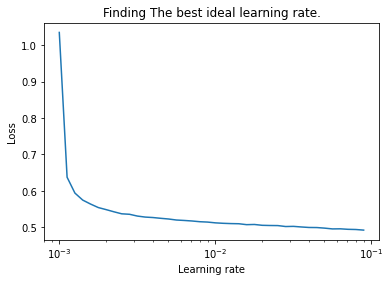

In [ ]:
# plot learning rate dcav curve
import pandas as pd
import matplotlib.pyplot as plt
lrs = 1e-3 * (10 **(tf.range(40)/20))
plt.semilogx(lrs,iedeal_model_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding The best ideal learning rate.")

In [ ]:
# refit the mode thist ideal learing rate use but see defult us learning rate but good in adam optimizer
# setup random seed
tf.random.set_seed(42)
# 1. Create the model
fashion_model_lr = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])

# 2. compile the model set best ideal learning rate
fashion_model_lr.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(lr=0.001),
                         metrics=["accuracy"])
# 3. fit the model
lr_history = fashion_model_lr.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# Evaluate the model we coul'd :

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.



In [ ]:
import itertools



# now create confustion matrix function
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
        size=text_size)


In [ ]:
# make prediction model
y_prob = fashion_model_lr.predict(test_data_norm)
# view the first prediction
y_prob[:5]

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.



In [ ]:
# see the predict first number and label of first predication
y_prob[0].argmax(),class_name[y_prob[0].argmax()]

In [ ]:
# Convert to all predicatin probarlity into label
y_preds = y_prob.argmax(1)
y_preds[:10]

In [ ]:
test_labels[:10]

In [ ]:
# let's check confusion matrix use sckit-learn confusion_matrix() use
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.



ValueError: ignored

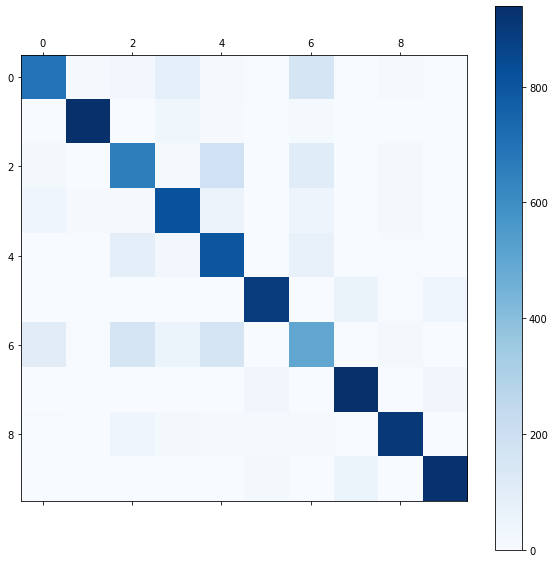

In [ ]:
# Make a prettiear confusion matrix
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_name,figsize=(10,10),text_size=15)